In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cost Function

### 1- Hinge loss

Hinge loss is used in the SVM Classifier to estimate the goodness of the model prediction:

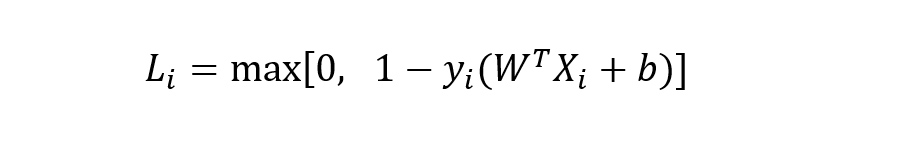

Which is equivalent to:

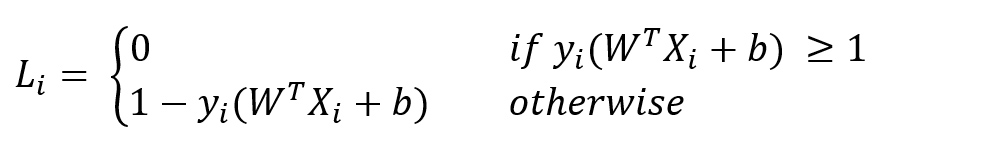

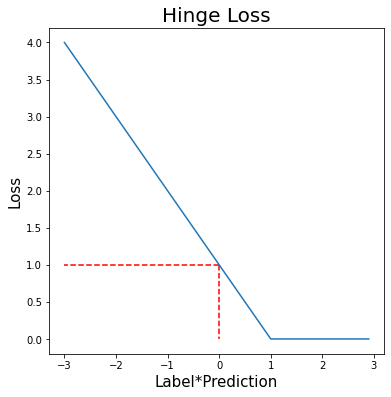

In [567]:
## Hinge Loss Visualized
predictions = np.arange(-3,3,0.1)
L = [1-i if i < 1 else 0 for i in predictions]

plt.figure(figsize = (6,6))
plt.plot(predictions, L)
plt.title('Hinge Loss', fontsize= 20)
plt.xlabel('Label*Prediction', fontsize= 15)
plt.ylabel('Loss', fontsize= 15)
plt.hlines( y = 1, xmax=-3, xmin = 0, linestyles= '--', color = 'red')
plt.vlines( x = 0, ymax=0, ymin = 1, linestyles= '--', color = 'red')
plt.show()

### 2- Regulatization term

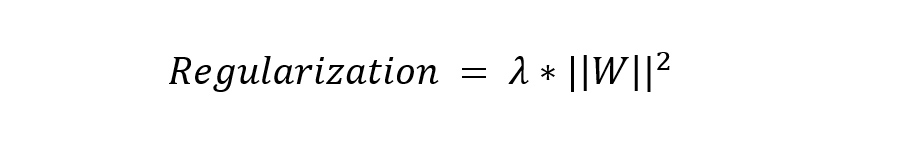

**FINAL COST FUNCTION**

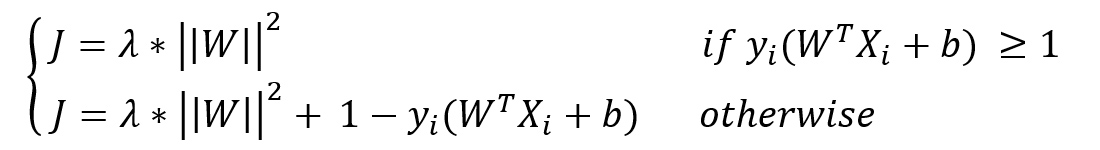

# Gradients

**For data points correctly classified**

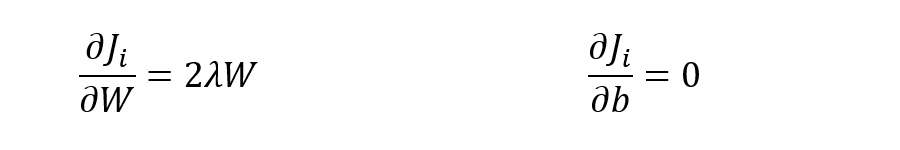

**For data points miss-classified**

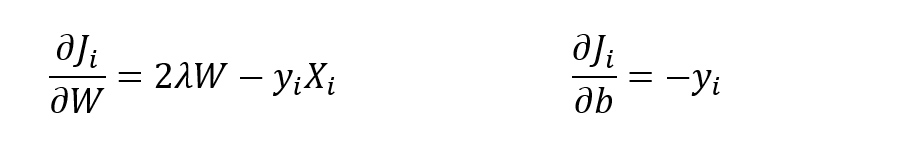

# Model Training

### Data

In [380]:
# Generating the data
positive_class = pd.DataFrame(np.random.multivariate_normal([5,5], [[1,0],[0,1]], size = 100), columns= ['X1', 'X2'])
positive_class['class'] = +1
negative_class = pd.DataFrame(np.random.multivariate_normal([0,0], [[1,0],[0,1]], size = 100), columns= ['X1', 'X2'])
negative_class['class'] = -1
data = positive_class.append(negative_class).sample(frac=1).reset_index(drop = True)
data.head()

,X1,X2,class
0,3.974487,3.542517,1
1,0.063987,-0.291100,-1
2,4.760608,4.510147,1
3,4.952315,4.527484,1
4,4.583514,4.038031,1


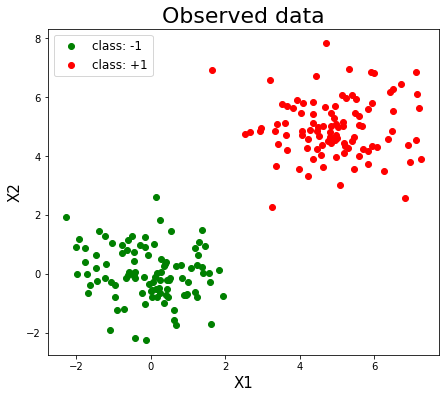

In [548]:
# Plotting the data
cdict = {1: 'red', -1: 'green'}
label = [-1,1]
label_dict = {1 : 'class: +1', -1 : 'class: -1' }

plt.figure(figsize=(7,6))
for g in label:
    ix = np.where(data['class'] == g)
    plt.scatter(data['X1'].values[ix], data['X2'].values[ix], c = cdict[g], label = label_dict[g])
plt.title('Observed data', fontsize = 22)
plt.xlabel('X1', fontsize = 15)
plt.ylabel('X2', fontsize = 15)
plt.legend(loc ='upper left', prop = {'size':12})
plt.show()

#### Helper functions

In [557]:
# Function to make the prediction
def prediction(w, b, X):
    '''
    w shape (k,1)
    X shape (k,)
    b shape (1,1)
    '''
    
    return np.dot(w.T, X) + b

# Function to calculate the hinge loss
def hinge(predictions):
    hing_loss = 1 - predictions[0]
    hing_loss = max(0, hing_loss)
    
    return hing_loss
    
# Function to calculate the gradients 
def gradients(lambda_reg, w,  X, observed, prediction):
    if prediction >=1:
        dj_dw = 2*lambda_reg*w
        dj_db = 0
    else:
        dj_dw = 2*lambda_reg*w - np.dot(np.expand_dims(X, axis =1), observed )
        dj_db = -observed
    
    return dj_dw, dj_db

#### Training

In [564]:
k = data.shape[1] - 1  # number of features, the last column is the class

# Initialize w and b
w = np.random.normal(size = (k,1))
b = np.random.normal()

# Hyperparameters
n_iter = 500           # number of iterations 
lambda_reg = 0.00001   # regularization parameter (low lambda --> hard margin SVM)
alpha = 0.01           # learning rate

Loss = [] # empty list for collecting loss at each iteration 

# Training loop
for i in range(n_iter):
    iter_loss = [] # empty list for collecting loss on each row
    for row in data.values:
        # Extract X , y 
        X = row[:-1]
        y = row[-1]
        
        # Make prediction
        pred = prediction(w, b, X)
        pred = y*pred      # multiply prediction by its label
        
        # Calculateloss on the data point
        hinge_loss_row = hinge(pred)
        iter_loss.append(hinge_loss_row) # append the loss to the list_loss list

        # Calculate the gradients 
        dj_dw, dj_db = gradients(lambda_reg, w, X, y, pred)

        # Update w and b
        w -=  alpha * dj_dw
        b -=  alpha * dj_db
    
    # Calculate the total iteration loss: mean of hinge loss + regularization term
    hinge_mean = np.mean(iter_loss)
    reg_term =  lambda_reg * np.sum(w**2)
    Loss.append(hinge_mean + reg_term) # append total cost to the list  

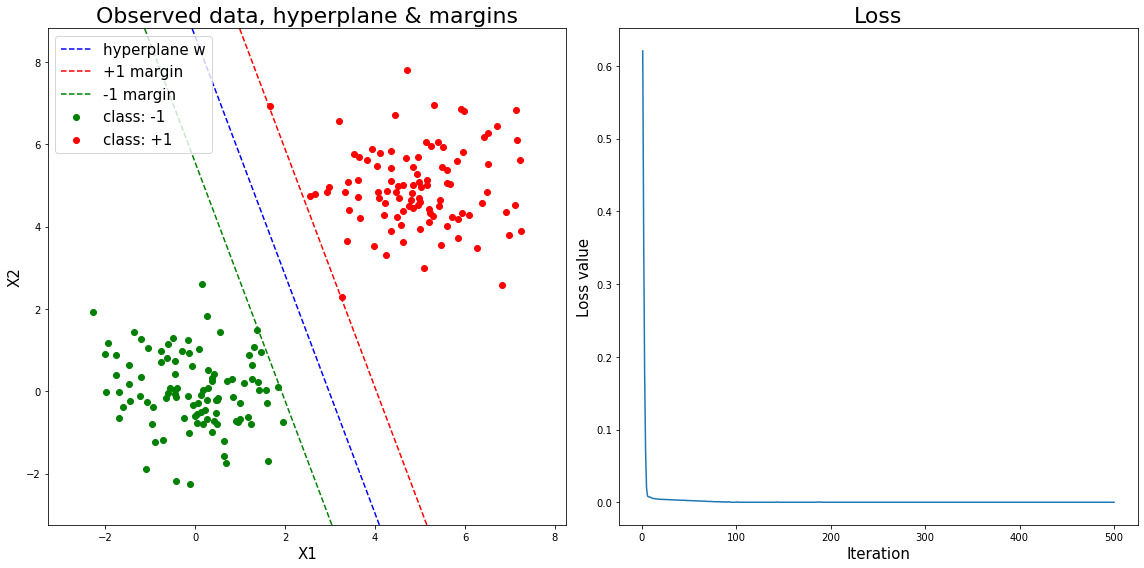

In [565]:
## Plot data and hyperplane
# Get an X1 min and max
X1min = data['X1'].min()
X1max = data['X1'].max()
# get an X2 min and max
X2min = data['X2'].min()
X2max = data['X2'].max()

# Hyperplane X2 values
X2a_W = (-w[0] * X1min - b) / w[1]
X2b_W = (-w[0] * X1max - b) / w[1]

# Right support vector X2 values
X2a_R = (1 -w[0] * X1min - b) / w[1]
X2b_R = (1 -w[0] * X1max - b) / w[1]

# Left support vector X2 values
X2a_L = (-1 -w[0] * X1min - b) / w[1]
X2b_L = (-1 -w[0] * X1max - b) / w[1]

##Plot everything
plt.figure(figsize=(16,8))
# Plot data, hyperplane and margins 
plt.subplot(1,2,1)
plt.plot([X1a, X1b], [X2a_W, X2b_W], label = 'hyperplane w', linestyle= '--', color = 'blue')
plt.plot([X1a, X1b], [X2a_R, X2b_R], label = '+1 margin', linestyle= '--', color = 'red')
plt.plot([X1a, X1b], [X2a_L, X2b_L], label = '-1 margin', linestyle= '--', color = 'green')
for g in label:
    ix = np.where(data['class'] == g)
    plt.scatter(data['X1'].values[ix], data['X2'].values[ix], c = cdict[g], label = label_dict[g])
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('Observed data, hyperplane & margins', fontsize = 22)
plt.xlabel('X1', fontsize = 15)
plt.ylabel('X2', fontsize = 15)
plt.legend(loc ='upper left', prop = {'size':15})
plt.xlim([X1min-1,X1max+1])
plt.ylim([X2min-1,X2max+1])

# Plot loss value
plt.subplot(1,2,2)
plt.plot(np.arange(1, n_iter+1), Loss)
plt.title('Loss', fontsize = 22)
plt.xlabel('Iteration', fontsize = 15)
plt.ylabel('Loss value', fontsize = 15)
plt.tight_layout()
plt.show()